In [11]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

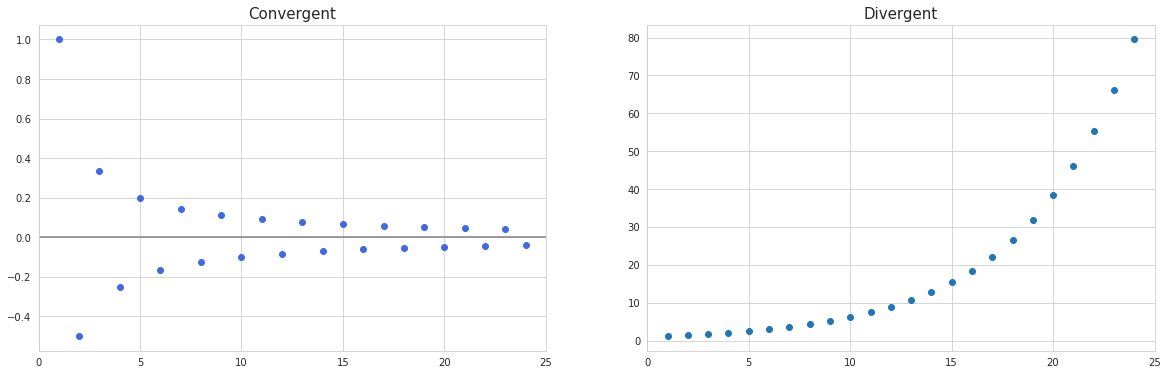

In [12]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    
x = np.arange(1, 25)
y1 = ((-1)**(x+1))/x

y2 = (1.2)**x

ax[0].plot([0, 25], [0, 0], color='grey')
ax[0].scatter(x, y1, color='royalblue')

ax[1].scatter(x, y2)

ax[0].set_title('Convergent', fontsize=15)
ax[1].set_title('Divergent', fontsize=15)

for ax in ax:
    ax.set_xlim(0, 25)
plt.savefig('../../assets/images/calculus/convergent_and_divergent_series.png', bbox_inches='tight');

# Taylor series

In [13]:
x = np.linspace(-16, 16, 300)

def func(x):
    return x*np.cos((x-7))

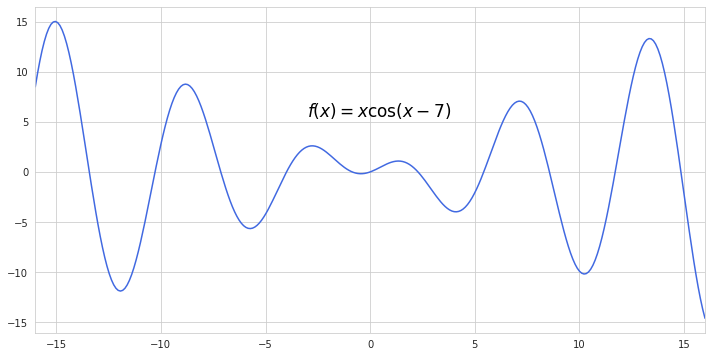

In [14]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')
ax.annotate(s=r'$f(x)=x\cos(x-7)$', xy=(0, 0), xytext=(-3, 5.5), fontsize=17)

ax.set_xlim(-16, 16)
plt.savefig('../../assets/images/calculus/random_function_example.png', bbox_inches='tight');

In [15]:
def get_derivative(func, degree=1):
    '''Get the derivative at 0 of n-th degree'''
    x = np.linspace(6, -6, 3000)
    dx = x[1]-x[0]
    y = func(x)
    for i in range(degree):
        y = np.gradient(y, dx)
    closest_to_0_x = min(x, key=lambda x:abs(x-0))
    zero_index_in_x = np.where(x==closest_to_0_x)[0][0]
    return y[zero_index_in_x]

In [16]:
def func2(x: np.ndarray, order: int = 0) -> np.ndarray:
    y = np.full(len(x), 0) # dummy series
    for i in range(order+1):
        if i == 0:
            y = y + np.power(x, i)*func(0)
        else:
            y = y + np.power(x, i)*get_derivative(func, degree=i)/factorial(i)
    return y

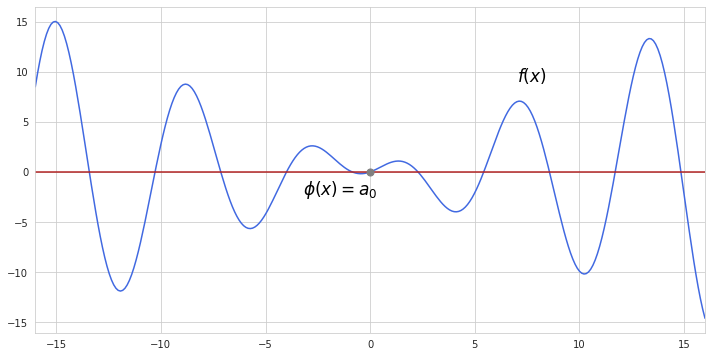

In [17]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')
ax.annotate(s='$f(x)$', xy=(0, 0), xytext=(7, 9), fontsize=17)

# point around which Taylor polynomial is centered
ax.scatter(0, func(0), color='grey', zorder=5, s=50)

# fitted function
ax.plot(x, func2(x), color='firebrick')
ax.annotate(s='$\phi(x)=a_0$', xy=(0, 0), xytext=(-3.2, -2.2), fontsize=17)

ax.set_xlim(-16, 16)
plt.savefig('../../assets/images/calculus/random_function_fit_constant_example.png', bbox_inches='tight');

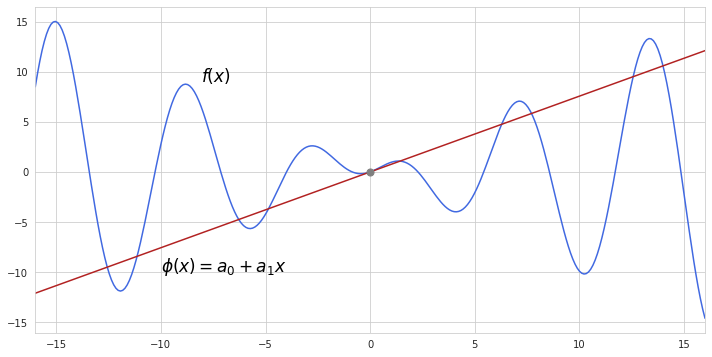

In [18]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')
ax.annotate(s='$f(x)$', xy=(0, 0), xytext=(-8.1, 9), fontsize=17)

# point around which Taylor polynomial is centered
ax.scatter(0, func(0), color='grey', zorder=5, s=50)
    
# fitted function
ax.plot(x, func2(x, 1), color='firebrick')
ax.annotate(s='$\phi(x)=a_0+a_{1}x$', xy=(0, 0), xytext=(-10, -9.9), fontsize=17)

ax.set_xlim(-16, 16)
plt.savefig('../../assets/images/calculus/random_function_fit_slope_example.png', bbox_inches='tight');

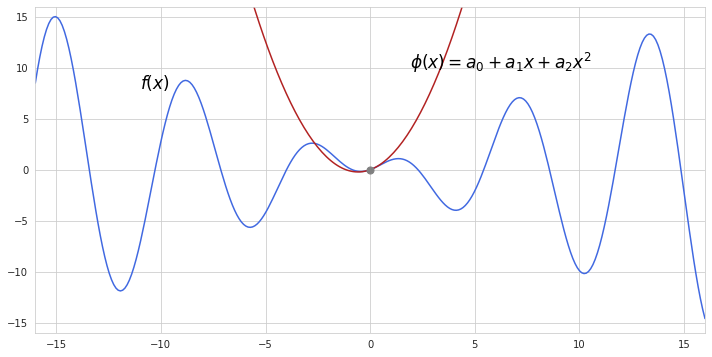

In [19]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')
ax.annotate(s='$f(x)$', xy=(0, 0), xytext=(-11, 8), fontsize=17)

# point around which Taylor polynomial is centered
ax.scatter(0, func(0), color='grey', zorder=5, s=50)
    
# fitted function
ax.plot(x, func2(x, 2), color='firebrick')
ax.annotate(s='$\phi(x)=a_0+a_{1}x+a_{2}x^2$', xy=(0, 0), xytext=(1.9, 9.9), fontsize=17)

ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
plt.savefig('../../assets/images/calculus/random_function_fit_curve_example.png', bbox_inches='tight');

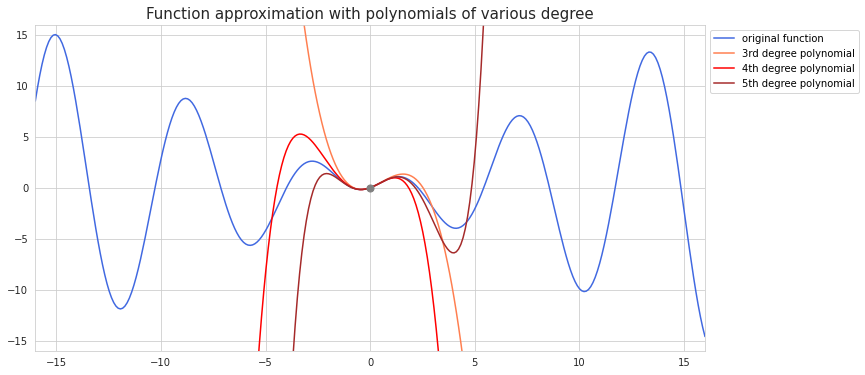

In [20]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue', label='original function')

# point around which Taylor polynomial is centered
ax.scatter(0, func(0), color='grey', zorder=5, s=50)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
    
# fitted function
ax.plot(x, func2(x, 3), color='coral', label='3rd degree polynomial')
ax.plot(x, func2(x, 4), color='red', label='4th degree polynomial')
ax.plot(x, func2(x, 5), color='brown', label='5th degree polynomial')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Function approximation with polynomials of various degree', fontsize=15)

plt.savefig('../../assets/images/calculus/random_function_fit_polynomials_example.png', bbox_inches='tight');